In [1]:
#Importing Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
sns.set_palette("bwr")
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
#importing csv datafile and displaying top 5 rows
df=pd.read_csv("diabetes_data.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
    #Pre-Processing the data
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace(" ", "_")
    zeroValues = ["Female", "Negative", "No"]
    oneValues = ["Male", "Positive", "Yes"]


    for column in df.columns:
        df[column] = df[column].replace(to_replace=[zeroValues], value=0)  
        df[column] = df[column].replace(to_replace=[oneValues], value=1)

In [4]:
#Renaming class to status and displaying top 5 rows after preporcessing.
df = df.rename({"class": "status"},axis="columns")
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,status
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
from sklearn.model_selection import train_test_split

x = df[df.columns.drop("status")]
y = df["status"]

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state=1)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

nb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = tree.DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state =1,eval_metric='logloss')
vot = VotingClassifier(
    estimators = [('nb',nb), ('lr',lr), ('dt',dt), ('rf',rf), ('svc',svc), ('knn',knn), ('xgb',xgb)],
    voting = 'soft'
)

models = [nb, lr, dt, rf, svc, knn, xgb, vot]
models_name = [
    "Naive Bayes",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM",
    "K-Nearest Neighbor",
    "XGBoost",
    "Voting"
]

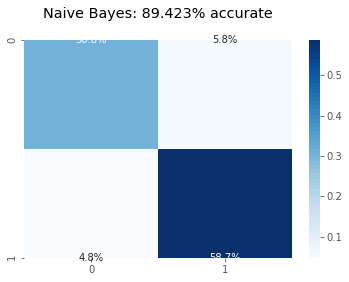

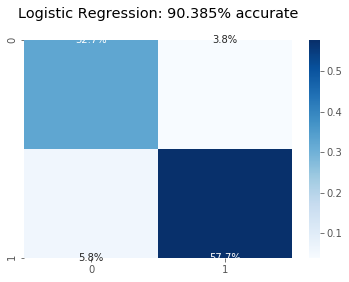

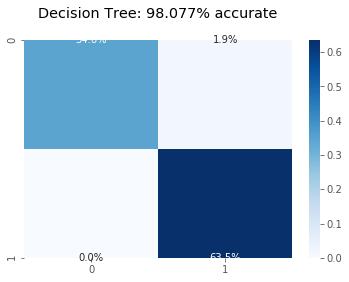

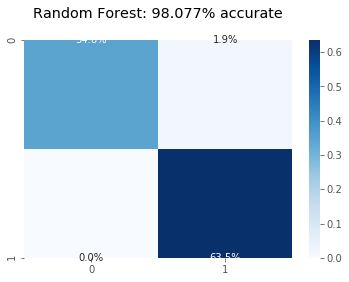

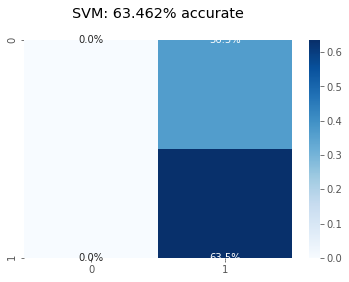

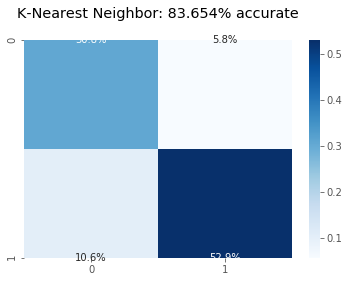

C:\Users\akaas\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akaas\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


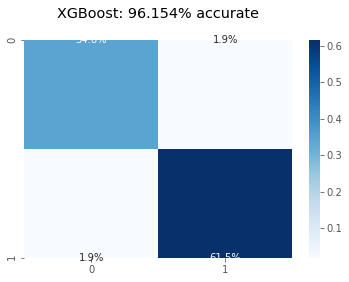

C:\Users\akaas\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akaas\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


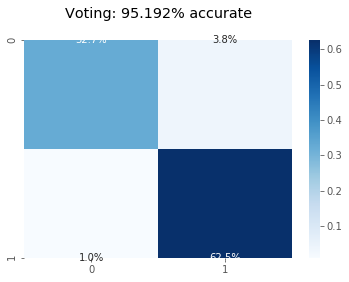

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score

results = {}

for index, model in enumerate(models):
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    confuse = confusion_matrix(y_test, predict)
    accur = accuracy_score(y_test, predict)
    results[models_name[index]] = accur * 100.0
    
    title = models_name[index] + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
    ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%', cmap="Blues")
    ax.set_title(title)
    plt.show()


In [8]:
import warnings
warnings.filterwarnings("ignore")
results_base = {}

for index, model in enumerate(models):
    cv = cross_val_score(model, x_train, y_train, cv=10)
    results_base[models_name[index]] = cv.mean() * 100.0
    print("Cross Validation Score of ", models_name[index], "=", cv.mean() * 100.0, "%", "and std:", cv.std())

Cross Validation Score of  Naive Bayes = 89.39024390243902 % and std: 0.05889375048349974
Cross Validation Score of  Logistic Regression = 92.05574912891986 % and std: 0.045030939743711564
Cross Validation Score of  Decision Tree = 95.91753774680605 % and std: 0.03860635738245776
Cross Validation Score of  Random Forest = 98.5423925667828 % and std: 0.022329348330149223
Cross Validation Score of  SVM = 61.056910569105696 % and std: 0.008719314461845986
Cross Validation Score of  K-Nearest Neighbor = 85.7897793263647 % and std: 0.0770574426037162
Cross Validation Score of  XGBoost = 97.34030197444831 % and std: 0.02969836848569952
Cross Validation Score of  Voting = 96.38211382113822 % and std: 0.03940608402531785


In [12]:
for index, model in enumerate(models):
    predict = model.predict(x_test)       
    report = classification_report(y_test,predict)
    print(models_name[index],":-")
    print(report)
    print('ROC AUC: ' ,roc_auc_score(y_test,predict))
  

Naive Bayes :-
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.91      0.92      0.92        66

    accuracy                           0.89       104
   macro avg       0.89      0.88      0.89       104
weighted avg       0.89      0.89      0.89       104

ROC AUC:  0.8831738437001594
Logistic Regression :-
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104

ROC AUC:  0.9019138755980862
Decision Tree :-
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        66

    accuracy                           0.98       104
   macro avg   

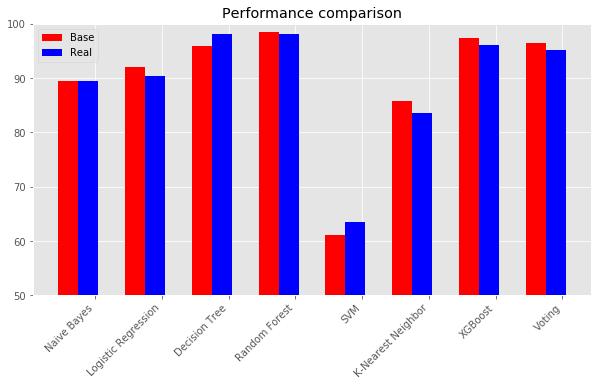

In [10]:
x = np.arange(len(results))

plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(x, results_base.values(), width=0.3, color="red", align="center")
ax.bar(x+0.3, results.values(), width=0.3, color="blue", align="center")
ax.legend(("Base", "Real"))
plt.ylim((50, 100))
plt.xticks(x+0.4, results_base.keys())
plt.title("Performance comparison")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

,0
age,0.094212
gender,0.087427
polyuria,0.247774
polydipsia,0.182543
sudden_weight_loss,0.057894
weakness,0.018608
polyphagia,0.038745
genital_thrush,0.019609
visual_blurring,0.030736
itching,0.027854


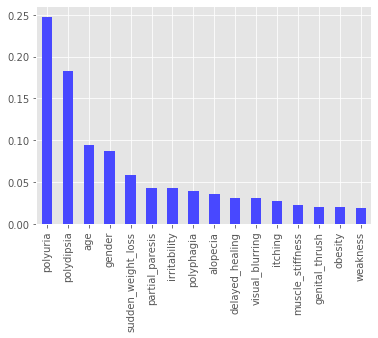

In [11]:
feature_importances = pd.Series(rf.feature_importances_, index=df.columns.drop("status"))
feature_importances.nlargest(20).plot(kind="bar")
feature_importances.to_frame()